In [ ]:
# a = []
# while(1):
#     a.append('1')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 2.3 MB/s eta 0:00:00


In [ ]:
import patoolib

# Extract the RAR file to a specific directory
patoolib.extract_archive('/content/drive/MyDrive/pbc_subset_v2.rar', outdir='/content/drive/MyDrive/')

patool: Extracting /content/drive/MyDrive/pbc_subset_v2.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/pbc_subset_v2.rar
patool:     with cwd='/content/drive/MyDrive/'
patool: ... /content/drive/MyDrive/pbc_subset_v2.rar extracted to `/content/drive/MyDrive/'.


'/content/drive/MyDrive/'

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Set the path to the dataset
data_path = '/content/drive/MyDrive/pbc_subset_v2'

# Define the classes
classes = ['monocyte', 'lymphocyte', 'neutrophil', 'basophil', 'ig', 'erythroblast', 'eosinophil', 'platelet']

# Load and preprocess the data
data = []
labels = []
for i, cls in enumerate(classes):
    class_path = os.path.join(data_path, cls)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (200,200))  # Resize the image to 128x128
        img = img.astype('float32') / 255  # Normalization
        data.append(img)
        labels.append(i)


In [ ]:
# Convert the data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
# One-hot encoding
labels = to_categorical(labels, num_classes=len(classes))

In [ ]:
# Split the data into training, testing, and validation sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.20, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [ ]:
len(train_data)

6312

In [ ]:
len(val_data)

1579

In [ ]:
len(test_data)

1973

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Set the path to the dataset
data_path = '/content/drive/MyDrive/pbc_subset_v2'

# Define the classes
classes = ['monocyte', 'lymphocyte', 'neutrophil', 'basophil', 'ig', 'erythroblast', 'eosinophil', 'platelet']

# Load and preprocess the data
data = []
labels = []
for i, cls in enumerate(classes):
    class_path = os.path.join(data_path, cls)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224,224))
        img = img.astype('float32') / 255
        data.append(img)
        labels.append(i)


In [ ]:
# Convert the data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
# One-hot encoding
labels = to_categorical(labels, num_classes=len(classes))

In [ ]:
# Split the data into training, testing, and validation sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.20, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

## Our final densenet 121

*   List item
*   List item



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import LearningRateScheduler
# Load pre-trained DenseNet121 model
base_model = DenseNet121(include_top=False, weights='imagenet')
# Set the number of layers to unfreeze
num_layers_to_unfreeze = 25
# Unfreeze layers
for layer in base_model.layers[-num_layers_to_unfreeze:]:
    layer.trainable = True

# Input layer
inputs = keras.Input(shape=(224, 224, 3))

# Data augmentation
x = layers.experimental.preprocessing.RandomFlip("horizontal")(inputs)
x = layers.experimental.preprocessing.RandomFlip("vertical")(x)
x = layers.experimental.preprocessing.RandomRotation(60)(x)
# Center cropping
x = layers.experimental.preprocessing.CenterCrop(height=224, width=224)(x)

# Pass the augmented input through the base model
x = base_model(x, training=True)  # Set training to True for unfrozen layers

# Global average pooling and dense output layer
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(8, activation="softmax")(x)

# Create the model
model_7 = keras.Model(inputs, outputs)

# Define the learning rate schedule
def lr_schedule(epoch):
    if epoch < 7:
        return 0.001
    if epoch <13:
        return 0.0001
    else:
      return 0.00001

# Compile the model with Adam optimizer and custom learning rate
model_7.compile(optimizer=Adam(learning_rate=lr_schedule(0)), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model for 15 epochs
history_densnet_exp = model_7.fit(train_data, train_labels, validation_data=(val_data, val_labels),
                    epochs=15, batch_size=32, callbacks=[lr_scheduler])

Epoch 1/15
198/198 [==============================] - 163s 401ms/step - loss: 0.2900 - accuracy: 0.9049 - val_loss: 0.1698 - val_accuracy: 0.9474 - lr: 0.0010
Epoch 2/15
198/198 [==============================] - 73s 368ms/step - loss: 0.1523 - accuracy: 0.9461 - val_loss: 0.1725 - val_accuracy: 0.9430 - lr: 0.0010
Epoch 3/15
198/198 [==============================] - 74s 372ms/step - loss: 0.1301 - accuracy: 0.9531 - val_loss: 0.1422 - val_accuracy: 0.9557 - lr: 0.0010
Epoch 4/15
198/198 [==============================] - 74s 375ms/step - loss: 0.1105 - accuracy: 0.9613 - val_loss: 0.2142 - val_accuracy: 0.9215 - lr: 0.0010
Epoch 5/15
198/198 [==============================] - 75s 377ms/step - loss: 0.1005 - accuracy: 0.9631 - val_loss: 0.1186 - val_accuracy: 0.9683 - lr: 0.0010
Epoch 6/15
198/198 [==============================] - 75s 378ms/step - loss: 0.0787 - accuracy: 0.9718 - val_loss: 0.0930 - val_accuracy: 0.9658 - lr: 0.0010
Epoch 7/15
198/198 [==============================]

In [ ]:
model_7.save("/content/drive/MyDrive/densnet_experiment_4_l25_.h5")

In [ ]:
import tensorflow as tf
model_7 = tf.keras.models.load_model("/content/drive/MyDrive/densnet_experiment_4_l25_.h5")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Get the predictions
preds = model_7.predict(test_data)
preds_classes = np.argmax(preds, axis=1)

# Get the actual labels
actual_labels = np.argmax(test_labels, axis=1)

# Print the classification report
print(classification_report(actual_labels, preds_classes, target_names=classes))

# Print the confusion matrix
print(confusion_matrix(actual_labels, preds_classes))

# Evaluate the model
loss, accuracy = model_7.evaluate(test_data, test_labels, verbose=0)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))


62/62 [==============================] - 11s 145ms/step
              precision    recall  f1-score   support

    monocyte       0.98      0.99      0.99       264
  lymphocyte       1.00      0.99      0.99       238
  neutrophil       0.99      0.97      0.98       246
    basophil       1.00      1.00      1.00       254
          ig       0.97      0.98      0.97       241
erythroblast       1.00      1.00      1.00       229
  eosinophil       1.00      1.00      1.00       277
    platelet       1.00      1.00      1.00       224

    accuracy                           0.99      1973
   macro avg       0.99      0.99      0.99      1973
weighted avg       0.99      0.99      0.99      1973

[[262   1   0   0   1   0   0   0]
 [  2 236   0   0   0   0   0   0]
 [  0   0 239   0   6   0   1   0]
 [  0   0   0 253   1   0   0   0]
 [  3   0   2   1 235   0   0   0]
 [  0   0   0   0   0 228   0   1]
 [  0   0   0   0   0   0 277   0]
 [  0   0   0   0   0   0   0 224]]
Test: accura

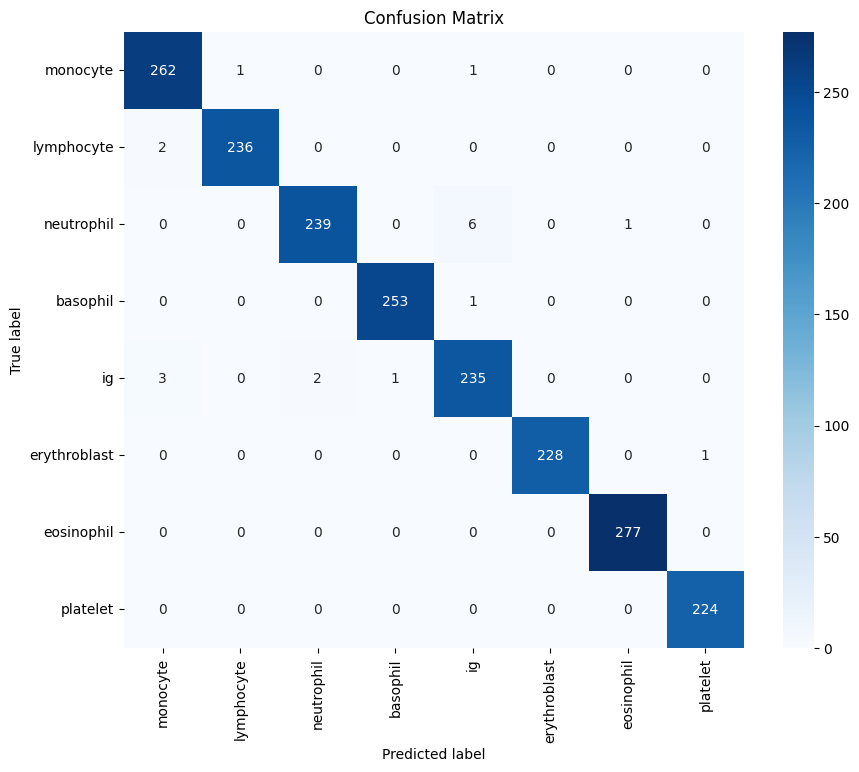

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(actual_labels, preds_classes)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, cohen_kappa_score

# Accuracy
accuracy = accuracy_score(actual_labels, preds_classes)
print("Accuracy: ", accuracy)

# Precision (also called Sensitivity)
precision = precision_score(actual_labels, preds_classes, average='micro')
print("Precision: ", precision)

# Recall (also called Sensitivity)
recall = recall_score(actual_labels, preds_classes, average='micro')
print("Recall: ", recall)

# F1 score
f1 = f1_score(actual_labels, preds_classes, average='micro')
print("F1 score: ", f1)

# Cohen's Kappa
kappa = cohen_kappa_score(actual_labels, preds_classes)
print("Cohen's Kappa: ", kappa)


Accuracy:  0.9903699949315763
Precision:  0.9903699949315763
Recall:  0.9903699949315763
F1 score:  0.9903699949315763
Cohen's Kappa:  0.9889868889716709


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
def sensitivity_specificity_accuracy(y_true, y_pred, classes):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    metrics = []
    for i, class_ in enumerate(classes):
        TP = np.diag(cm)[i]
        FP = cm[:,i].sum() - TP
        FN = cm[i,:].sum() - TP
        TN = cm.sum() - (FP + FN + TP)

        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
        accuracy = accuracy_score(y_true == i, y_pred == i)

        metrics.append([class_, sensitivity, specificity, accuracy])

    df = pd.DataFrame(metrics, columns=['Class', 'Sensitivity', 'Specificity', 'Accuracy'])
    return df

# Get the predictions
preds = model_7.predict(test_data)
preds_classes = np.argmax(preds, axis=1)

# Get the actual labels
actual_labels = np.argmax(test_labels, axis=1)

# Print the classification report
print(classification_report(actual_labels, preds_classes, target_names=classes))

# Print the confusion matrix
print(confusion_matrix(actual_labels, preds_classes))

# Print sensitivity, specificity, and accuracy
df_metrics = sensitivity_specificity_accuracy(actual_labels, preds_classes, classes)
print(df_metrics)
# Evaluate the model
loss, accuracy = model_7.evaluate(test_data, test_labels, verbose=0)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

62/62 [==============================] - 6s 105ms/step
              precision    recall  f1-score   support

    monocyte       0.98      0.99      0.99       264
  lymphocyte       1.00      0.99      0.99       238
  neutrophil       0.99      0.97      0.98       246
    basophil       1.00      1.00      1.00       254
          ig       0.97      0.98      0.97       241
erythroblast       1.00      1.00      1.00       229
  eosinophil       1.00      1.00      1.00       277
    platelet       1.00      1.00      1.00       224

    accuracy                           0.99      1973
   macro avg       0.99      0.99      0.99      1973
weighted avg       0.99      0.99      0.99      1973

[[262   1   0   0   1   0   0   0]
 [  2 236   0   0   0   0   0   0]
 [  0   0 239   0   6   0   1   0]
 [  0   0   0 253   1   0   0   0]
 [  3   0   2   1 235   0   0   0]
 [  0   0   0   0   0 228   0   1]
 [  0   0   0   0   0   0 277   0]
 [  0   0   0   0   0   0   0 224]]
          Cla